# 7) Kreuztabellierung

Diese Kapitel beschäftigt sich mit einer in den Sozialwissenschaften sehr häufig angewandten Methode; allerdings vorerst nur rein deskriptiv, sozusagen als zweidimensionale Häufigkeitsanalyse. Die mit der Kreuztabellierung häufig verbundenen statistischen Analysen sind mit **Pandas** nicht möglich und werden später in Kapitel 14 behandelt.

Importieren wir zuerst wieder **Pandas** und laden den bereits bekannten Datensatz.

In [2]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3).round(2)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.67,3.67
1,1,57,1,1.00,3.33
2,2,66,3,2.00,4.33


### 7.1) Kreuztabellen mit crosstab()

**Pandas** bietet mit **crosstab()** eine Funktion zur Erstellung von zwei- und dreidimensionalen Kreuztabellen. Sehen wir uns im ersten Beispiel den Zusammenhang von *sex* und *wohnort* an.

**crosstab()** bietet ein paar interessante Optionen, daher sollte die Dokumentation (vgl. Link) durchgesehen werden.

[pandas.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html#pandas.crosstab)

In [11]:
kreuztab = pd.crosstab(daten.wohnort, daten.sex) # Abbildung der absoluten Häufigkeiten

# die Zuweisung der Kreuztabelle zum Objekt 'kreuztab' erfolgt nur, weil wir die Daten weiter unten noch für eine Grafik verwenden wollen.

kreuztab

sex,1,2
wohnort,,
1,58,37
2,35,25
3,73,66


##### Mit Randsummen

Unsere erste Kreuztabelle enthielt die absoluten Häufigkeiten, d.h. man weiß nun z.B., dass 58 Frauen in ländlicher Umgebung wohnen, 25 Männer in kleinstädtischer Umgebung wohnen, usw. Lassen wir uns nun noch die Randsummen ausgeben, dann wissen wir auch, wieviele Personen insgesamt auf jeden Wohnort kommen bzw. wieviele Frauen bzw. Männer in der Stichprobe sind.

In [14]:
pd.crosstab(daten.wohnort, daten.sex, margins = True)
# 'margins=True' gibt uns die Randsummen aus ('False' ist die Standardeinstellung)

sex,1,2,All
wohnort,,,
1,58,37,95
2,35,25,60
3,73,66,139
All,166,128,294


##### Grafische Darstellung

Kreuztabellen können natürlich auch grafisch dargestellt werden, insbesondere mit einem gestapelten Säulendiagramm.

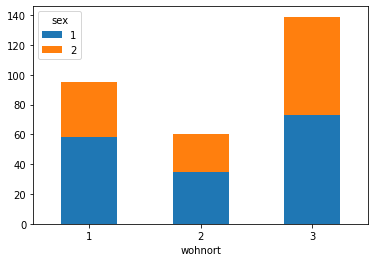

In [15]:
ax = kreuztab.plot.bar(rot = 0, stacked = True)
# 'stacked=True' liefert gestapelte Säulen, 'False' ist die Standardeinstellung und liefert getrennte Säulen pro Geschlecht

##### Gestapeltes (auf 100% pro Säule) Diagramm inkl. Anzeige der dazugehörigen Kreuztabelle mit Zeilenprozenten

Absolute Häufigkeiten lassen Zusammenhänge aber nur schwer erkennen; deshalb möchte man in Kreuztabellen zumeist auch relative Häufigkeiten (Prozentwerte) abbilden - und zwar typischerweise in Richtung der unabhängigen Variable. D.h., befindet sich die UV in den Spalten der Kreuztabelle, wird spaltenweise auf 100% aufsummiert, befindet sich die UV in den Zeilen, wird zeilenweise auf 100% aufsummiert. In unserem Beispiel können wir aber nicht unbedingt davon sprechen, eine UV bzw. eine AV zu haben. Nehmen wir an, uns interessiert die Geschlechterverteilung pro Wohnort - in diesem Fall prozentuieren wir nach Wohnort.

Im folgenden Beispiel berechnen wir - mit den Daten aus der ersten Kreuztabelle von vorhin (Objekt *a*) - mittels einer **lambda** Funktion die Zeilenprozente. Früher musste man dies so durchführen, mittlerweile exisitiert in Pandas aber schon seit längerem auch eine komfortablere Möglichkeit, wie wir weiter unten noch sehen werden.

[Display percent of 100 in stacked bar plot from crosstab from matplotlib in pandas ](https://stackoverflow.com/questions/57981287/display-percent-of-100-in-stacked-bar-plot-from-crosstab-from-matplotlib-in-pand)

[pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

sex,1,2
wohnort,,
1,61.05,38.95
2,58.33,41.67
3,52.52,47.48


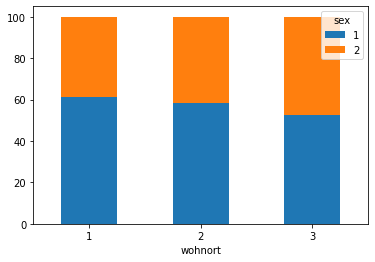

In [20]:
crosstab = kreuztab.apply(lambda z: z/z.sum()*100, axis = 1).round(2) # Berechnung der Zeilenprozente,
# 'axis = 0' (Spaltenprozente) / 'axis = 1' (Zeilenprozente)

# Variablen werden aus obiger Kreuztabelle übernommen ('kreuztab' steht für obige Kreuztabelle)

display(crosstab) # Anzeige der neuen Kreuztabelle mit Zeilenprozenten. Oder nur 'crosstab' in Jupyter...

ax = crosstab.plot.bar(stacked = True, rot = 0) # Anzeige der Grafik

Durch diese Darstellung, sowohl tabellarisch als auch grafisch, können nun Zusammenhänge bzw. Unterschiede leichter ausgemacht werden. So geht klar hervor, dass das Geschlechterverhältnis in der Stichprobe bei Wohnort 3 beinahe ausgewogen ist, während bei Wohnort 1 über 61% Frauen und nur knapp 39% Männer befragt werden konnten.

Einfacher geht die Prozentuierung mit dem Parameter **normalize**. Damit hat man folgende Möglichkeiten:

|Option||Option||
|-|-|-|-|
|'index'|Prozentuierung entlang der Zeilen|True|Prozentuierung über alle Werte|
|1|Prozentuierung entlang der Zeilen|'all'|Prozentuierung über alle Werte|
|'columns'|Prozentuierung entlang der Spalten|False|keine Prozentuierung, Standardeinstellung|
|0|Prozentuierung entlang der Spalten|

In [21]:
pd.crosstab(daten.wohnort, daten.sex, normalize = 'index').round(4)*100

sex,1,2
wohnort,,
1,61.05,38.95
2,58.33,41.67
3,52.52,47.48


Obige Tabelle liefert natürlich das gleiche Ergebnis wie unsere eigene Berechnung mittels **lambda** Funktion - nur einfacher.

##### "Dreidimensionale" Kreuztabelle mit crosstab()

Auch das Hinzufügen einer dritten Variable ist mit der **crosstab()** Funktion möglich. Da unser kleiner Datensatz derzeit keine passende dritte Variable enthält, erstellen wir einfach eine. Die Variable *hardrock*, mit derzeit insgesamt 16 Ausprägungen (div. Dezimalzahlen zwischen 1 und 5) soll durch eine Division ohne Rest schließlich nur mehr 5 Ausprägungen haben (1, 2, 3, 4, 5). Da wir die Variable nicht überschreiben wollen, fügen wir eine neue Variable ins Dataframe ein.

In [22]:
daten['hardrockpräferenz'] = daten['hardrock']//1 # d.h. bspw. alle Werte von 1 bis <2 werden zu 1, von 2 bis <3 zu 2, usw.

In [24]:
daten.head().round(2)

,sex,age,wohnort,volksmusik,hardrock,hardrockpräferenz
0,1,50,2,2.67,3.67,3.0
1,1,57,1,1.00,3.33,3.0
2,2,66,3,2.00,4.33,4.0
3,1,50,2,2.33,2.67,2.0
4,1,60,3,2.33,3.00,3.0


Erstellen wir nun eine Kreuztabelle mit drei Variablen. *sex* und *wohnort* sollen in den Zeilen zu finden sein, *hardrockpräferenz* in den Spalten (innerhalb eckiger Klammern muss stets die dritte Variable stehen, egal ob sie als Zeilen- oder Spaltenvariable dienen soll). Zusätzlich prozentuieren wir im Beispiel nach Zeilen und lassen und die Randsummen (in diesem Fall: Randprozente) ausgeben.

In [28]:
crosstab3D = pd.crosstab([daten.sex, daten.wohnort], daten.hardrockpräferenz, normalize = 'index', margins = True).round(4)*100
# bzw. '(daten.wohnort, [daten.sex, daten.hardrockpräferenz])' wenn 'sex' als Drittvariable in den Spalten stehen soll

crosstab3D

hardrockpräferenz    1.0    2.0    3.0    4.0   5.0
sex wohnort                                        
1   1               8.62  24.14  36.21  31.03  0.00
    2               8.57  25.71  40.00  17.14  8.57
    3              17.81  17.81  35.62  26.03  2.74
2   1              27.03  29.73  29.73  10.81  2.70
    2              20.00  36.00  28.00   8.00  8.00
    3              21.21  28.79  30.30  15.15  4.55
All                17.01  25.51  33.67  20.07  3.74

Eine solche Kreuztabelle kann auch grafisch dargestellt werden, allerdings ist dies nicht mehr ganz so einfach les- bzw. interpretierbar.

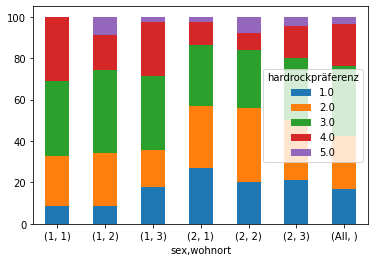

In [29]:
ax = crosstab3D.plot.bar(stacked = True, rot = 0)

##### Weitere Möglichkeiten mit Kreuztabellen

Darstellungen der absoluten oder relativen Häufigkeiten sind nicht alles, was mit **crosstab()** möglich ist. Mit **aggfunc** lassen sich div. Kennzahlen einer dritten Variable in der Kreuztabelle darstellen. Im Folgenden wird wieder eine einfache Kreuztabelle mit *sex* und *wohnort* erstellt. In den Zellen abgebildet werden soll aber jeweils der Mittelwert der Variable *volksmusik*. Man erhält also mit dieser Kreuztabelle Informationen über die Volksmusikpräferenz nach Geschlecht und Wohnort.

[Pandas Crosstab Explained](https://pbpython.com/pandas-crosstab.html)

In [30]:
crosstabNeu = pd.crosstab(daten.sex, daten.wohnort, values = daten.volksmusik, aggfunc='mean').round(2)

crosstabNeu # zwecks zuweisung zu grafik unten...

wohnort,1,2,3
sex,,,
1,3.38,3.71,4.11
2,3.41,3.64,4.02


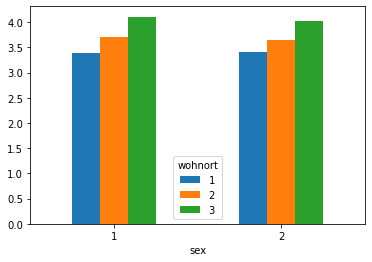

In [31]:
ax = crosstabNeu.plot.bar(rot = 0, stacked = False)

Man sieht, dass die Präferenz von Volksmusik bei beiden Geschlechtern von ländlicher Umgebung (1) über kleinstädtische Umgebung (2) bis hin zu großstädtischer Umgebung (3) jeweils leicht abnimmt.

### 7.2) Kreuztabellierung mit groupby()

**crosstab()** ist nicht die einzige Möglichkeit, mit **Pandas** Kreuztabellen zu erstellen. Auch mit der aus dem vorangegangenen Kapitel bekannten Funktion **groupby()** können im Grunde die gleichen Kreuztabellen erstellt werden. Die Schreibweise des Codes unterscheidet sich natürlich.

[Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

In [32]:
kt = daten.groupby(['wohnort', 'sex'])['sex'].count().unstack()
# '.unstack()' für den 'Kreuztabellenlook' nötig. Anderenfalls würden beide Variablen als Zeilenvariablen dargestellt.

kt

sex,1,2
wohnort,,
1,58,37
2,35,25
3,73,66


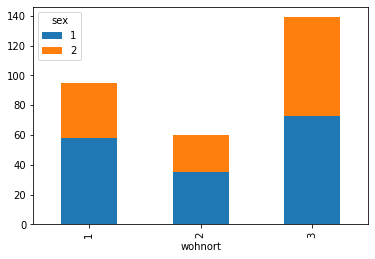

In [33]:
ax = kt.plot.bar(stacked = True)

Möchte man bei **groupby()**-Kreuztabellen relative Häufigkeiten, ist man auf die bereits bekannte lambda Funktion angewiesen.

In [34]:
ktNeu = kt.apply(lambda z: z/z.sum()*100, axis = 1).round(2) # 'axis=1' = zeilenweise Prozentuierung

ktNeu

sex,1,2
wohnort,,
1,61.05,38.95
2,58.33,41.67
3,52.52,47.48


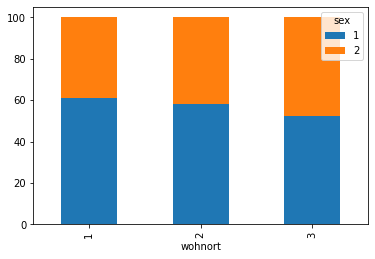

In [36]:
ax = ktNeu.plot.bar(stacked = True)

##### "Dreidimensionale" Kreuztabelle mit groupby()

Auch das ist mit **groupby()** möglich. Zuerst wird wieder eine dritte kategoriale Variable erstellt, das Alter in Jahrzehnten.

In [40]:
daten['Lebensjahrzehnt'] = daten['age']//10+1

# '//' = Division ohne Rest (z.B. 18//10 = 1), plus Addition von 1 (z.B. 18//10+1 = 2, also 2. Lebensjahrzehnt)

In [41]:
daten.head().round(2)

,sex,age,wohnort,volksmusik,hardrock,hardrockpräferenz,Lebensjahrzehnt
0,1,50,2,2.67,3.67,3.0,6
1,1,57,1,1.00,3.33,3.0,6
2,2,66,3,2.00,4.33,4.0,7
3,1,50,2,2.33,2.67,2.0,6
4,1,60,3,2.33,3.00,3.0,7


Erstellen wir nun unsere Kreuztabelle mit *sex* als dritter übergeordneter Variable, sowie *wohnort* als Zeilen- und *Lebensjahrzehnt* als Spaltenvariable. 

In [52]:
daten.groupby(['sex', 'wohnort', 'Lebensjahrzehnt'])['Lebensjahrzehnt'].count().unstack() # '.unstack()' ist nötig, um Kreuztabellenform zu erhalten

Lebensjahrzehnt   2     3     4     5     6    7    8    10
sex wohnort                                                
1   1            NaN  19.0   8.0  16.0  12.0  1.0  1.0  1.0
    2            NaN  13.0   6.0   6.0   8.0  2.0  NaN  NaN
    3            NaN  39.0  13.0   6.0  11.0  2.0  2.0  NaN
2   1            1.0   7.0  10.0   7.0   9.0  2.0  1.0  NaN
    2            NaN   8.0   3.0   5.0   5.0  3.0  1.0  NaN
    3            NaN  23.0  19.0   8.0  10.0  5.0  1.0  NaN

Abgebildet werden absolute Häufigkeiten. Diese Tabelle bietet uns also eine Übersicht der Anzahl der Befragten nach Geschlecht, Wohnort und Lebensjahrzehnt.

Offenbar liegen für einige Zeilen-/Spaltenkombinationen keine Werte vor. Man kann diese Zellen (derzeit: 'NaN') mit '0' auffüllen, wenn man möchte. Dazu **fillna()** anfügen (und in unserem Fall den Wert '0' als Auffüllwert angeben).

In [53]:
daten.groupby(['sex', 'wohnort', 'Lebensjahrzehnt'])['Lebensjahrzehnt'].count().unstack().fillna(0)

Lebensjahrzehnt   2     3     4     5     6    7    8    10
sex wohnort                                                
1   1            0.0  19.0   8.0  16.0  12.0  1.0  1.0  1.0
    2            0.0  13.0   6.0   6.0   8.0  2.0  0.0  0.0
    3            0.0  39.0  13.0   6.0  11.0  2.0  2.0  0.0
2   1            1.0   7.0  10.0   7.0   9.0  2.0  1.0  0.0
    2            0.0   8.0   3.0   5.0   5.0  3.0  1.0  0.0
    3            0.0  23.0  19.0   8.0  10.0  5.0  1.0  0.0